## I. Load Data and Objectives

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
import datetime as dt

# Load data
df = pd.read_excel("./Real estate valuation data set.xlsx")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [115]:
df.shape

(414, 8)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Column "No" is index, so remove this one keep index

In [117]:
df.drop(columns=["No"], inplace=True)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


Convert X1 from Float to Timeframe

our hypothesis is 2013.500 is June/2013

In [118]:
def convert_to_datetime(years):
    year = int(years)
    month = np.rint((years - year) * 12)
    base_date = pd.to_datetime(f"{year}")
    return base_date + pd.DateOffset(months=month)


df["X1 transaction date"] = df["X1 transaction date"].apply(convert_to_datetime)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012-12-01,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012-12-01,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013-07-01,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012-11-01,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013-01-01,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012-09-01,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013-04-01,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013-01-01,8.1,104.81010,5,24.96674,121.54067,52.5


In [119]:
df["X1 transaction date"]

0     2012-12-01
1     2012-12-01
2     2013-08-01
3     2013-07-01
4     2012-11-01
         ...    
409   2013-01-01
410   2012-09-01
411   2013-04-01
412   2013-01-01
413   2013-07-01
Name: X1 transaction date, Length: 414, dtype: datetime64[ns]

We know that the hypothesis is that 2013.500 is June/2013

Thus, we check our code

In [120]:
df.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Duplicated?

In [121]:
df.duplicated().sum()

0

Boxplot to see outliers

Dist. plot and Boxplot of data

C:\Users\Hort\AppData\Local\Temp\ipykernel_12556\477546445.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[column], palette="Dark2")
C:\Users\Hort\AppData\Local\Temp\ipykernel_12556\477546445.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[column], palette="Dark2")
C:\Users\Hort\AppData\Local\Temp\ipykernel_12556\477546445.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[column], palette="Dark2")
C:\Users\Hort\AppData\Local\Temp\ipykernel_12556\477546445.py:6: FutureWarning: 

Passing `palette` without assi

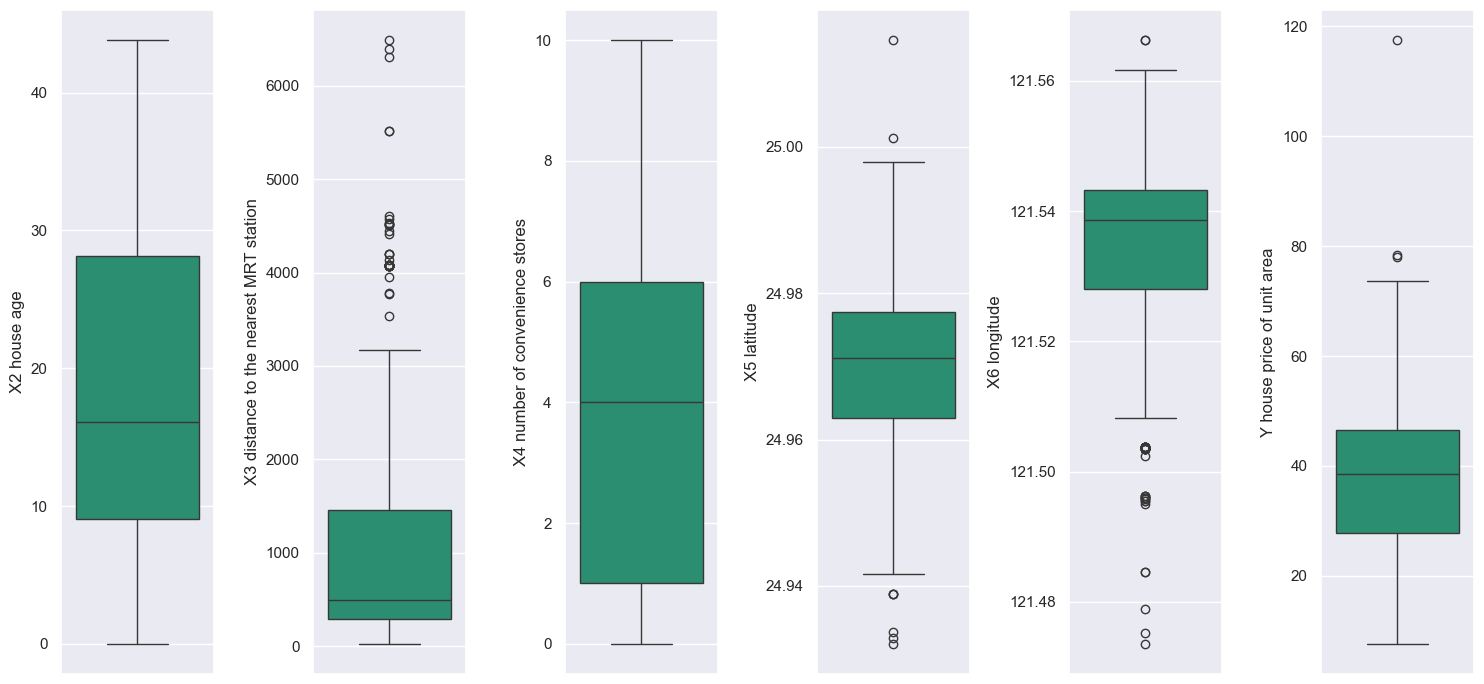

In [122]:
numerical_columns = df.select_dtypes(include="number").columns.tolist()
plt.figure(figsize=(15, 7))

for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.boxplot(data=df[column], palette="Dark2")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [123]:
# for column in df.select_dtypes(include="number").columns.tolist():
#     plt.figure(figsize=(15, 7))
#     plt.subplot(1, 2, 1)
#     plt.title("dist plot of " + column, fontsize=15)
#     sns.distplot(
#         df[column],
#         bins=15,
#         )
#     plt.subplot(1, 2, 2)
#     plt.title("Boxplot of " + column, fontsize=15)
#     sns.boxplot(data=df[column], palette="Dark2")
#     plt.show()

In [124]:
df_capped = df.copy()

Deal with outliers by capping data

In [125]:
for column in df_capped.select_dtypes(include="number").columns.tolist():
    Q1 = df_capped[column].quantile(0.25)
    Q3 = df_capped[column].quantile(0.75)
    IQR = Q3 - Q1
    max_limit = Q3 + (1.5 * IQR)
    min_limit = Q1 - (1.5 * IQR)
    df_capped[column] = pd.DataFrame(
        np.where(
            df_capped[column] > max_limit,
            max_limit,
            (np.where(df_capped[column] < min_limit, min_limit, df_capped[column])),
        ),
        columns=[column],
    )

Dist. plot and Boxplot of data after capped

C:\Users\Hort\AppData\Local\Temp\ipykernel_12556\1454139934.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_capped[column], palette="Dark2")
C:\Users\Hort\AppData\Local\Temp\ipykernel_12556\1454139934.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_capped[column], palette="Dark2")
C:\Users\Hort\AppData\Local\Temp\ipykernel_12556\1454139934.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_capped[column], palette="Dark2")
C:\Users\Hort\AppData\Local\Temp\ipykernel_12556\1454139934.py:5: FutureWarning: 

Passi

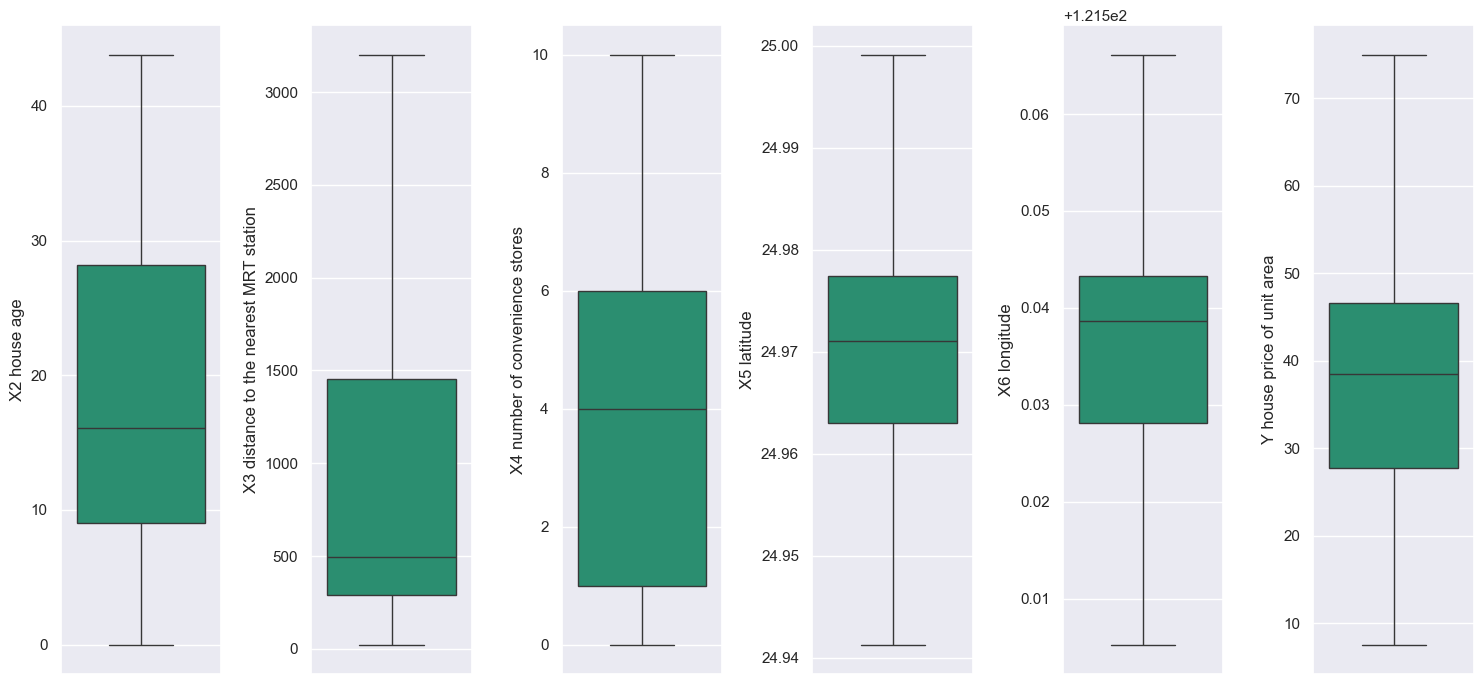

In [126]:
plt.figure(figsize=(15, 7))

for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.boxplot(data=df_capped[column], palette="Dark2")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [127]:
# for column in df_capped.select_dtypes(include="number").columns.tolist():
#     plt.figure(figsize=(15, 7))
#     plt.subplot(1, 2, 1)
#     plt.title("dist plot of " + column, fontsize=15)
#     sns.distplot(df_capped[column], bins=15)
#     plt.subplot(1, 2, 2)
#     plt.title("Boxplot of " + column, fontsize=15)
#     sns.boxplot(data=df_capped[column], palette="Dark2")
#     plt.show()

EDA and Data visualization

In [128]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
X1 transaction date,414,2013-02-23 14:19:07.826086912,2012-09-01 00:00:00,2012-12-01 00:00:00,2013-03-01 00:00:00,2013-06-01 00:00:00,2013-08-01 00:00:00,NaN
X2 house age,414.0,17.71256,0.0,9.025,16.1,28.15,43.8,11.392485
X3 distance to the nearest MRT station,414.0,1083.885689,23.38284,289.3248,492.2313,1454.279,6488.021,1262.109595
X4 number of convenience stores,414.0,4.094203,0.0,1.0,4.0,6.0,10.0,2.945562
X5 latitude,414.0,24.96903,24.93207,24.963,24.9711,24.977455,25.01459,0.01241
X6 longitude,414.0,121.533361,121.47353,121.528085,121.53863,121.543305,121.56627,0.015347
Y house price of unit area,414.0,37.980193,7.6,27.7,38.45,46.6,117.5,13.606488


In [129]:
df_capped.describe().T

,count,mean,min,25%,50%,75%,max,std
X1 transaction date,414,2013-02-23 14:19:07.826086912,2012-09-01 00:00:00,2012-12-01 00:00:00,2013-03-01 00:00:00,2013-06-01 00:00:00,2013-08-01 00:00:00,NaN
X2 house age,414.0,17.71256,0.0,9.025,16.1,28.15,43.8,11.392485
X3 distance to the nearest MRT station,414.0,974.545851,23.38284,289.3248,492.2313,1454.279,3201.7103,968.915855
X4 number of convenience stores,414.0,4.094203,0.0,1.0,4.0,6.0,10.0,2.945562
X5 latitude,414.0,24.969067,24.941318,24.963,24.9711,24.977455,24.999137,0.01208
X6 longitude,414.0,121.533974,121.505255,121.528085,121.53863,121.543305,121.566135,0.013779
Y house price of unit area,414.0,37.861957,7.6,27.7,38.45,46.6,74.95,13.112035


Average House Price of unit area: 37.86

Cheapest House Price of unit area: 7.6

Largest House Price of unit area: 27.7

Data Visualization: mainly use histogram

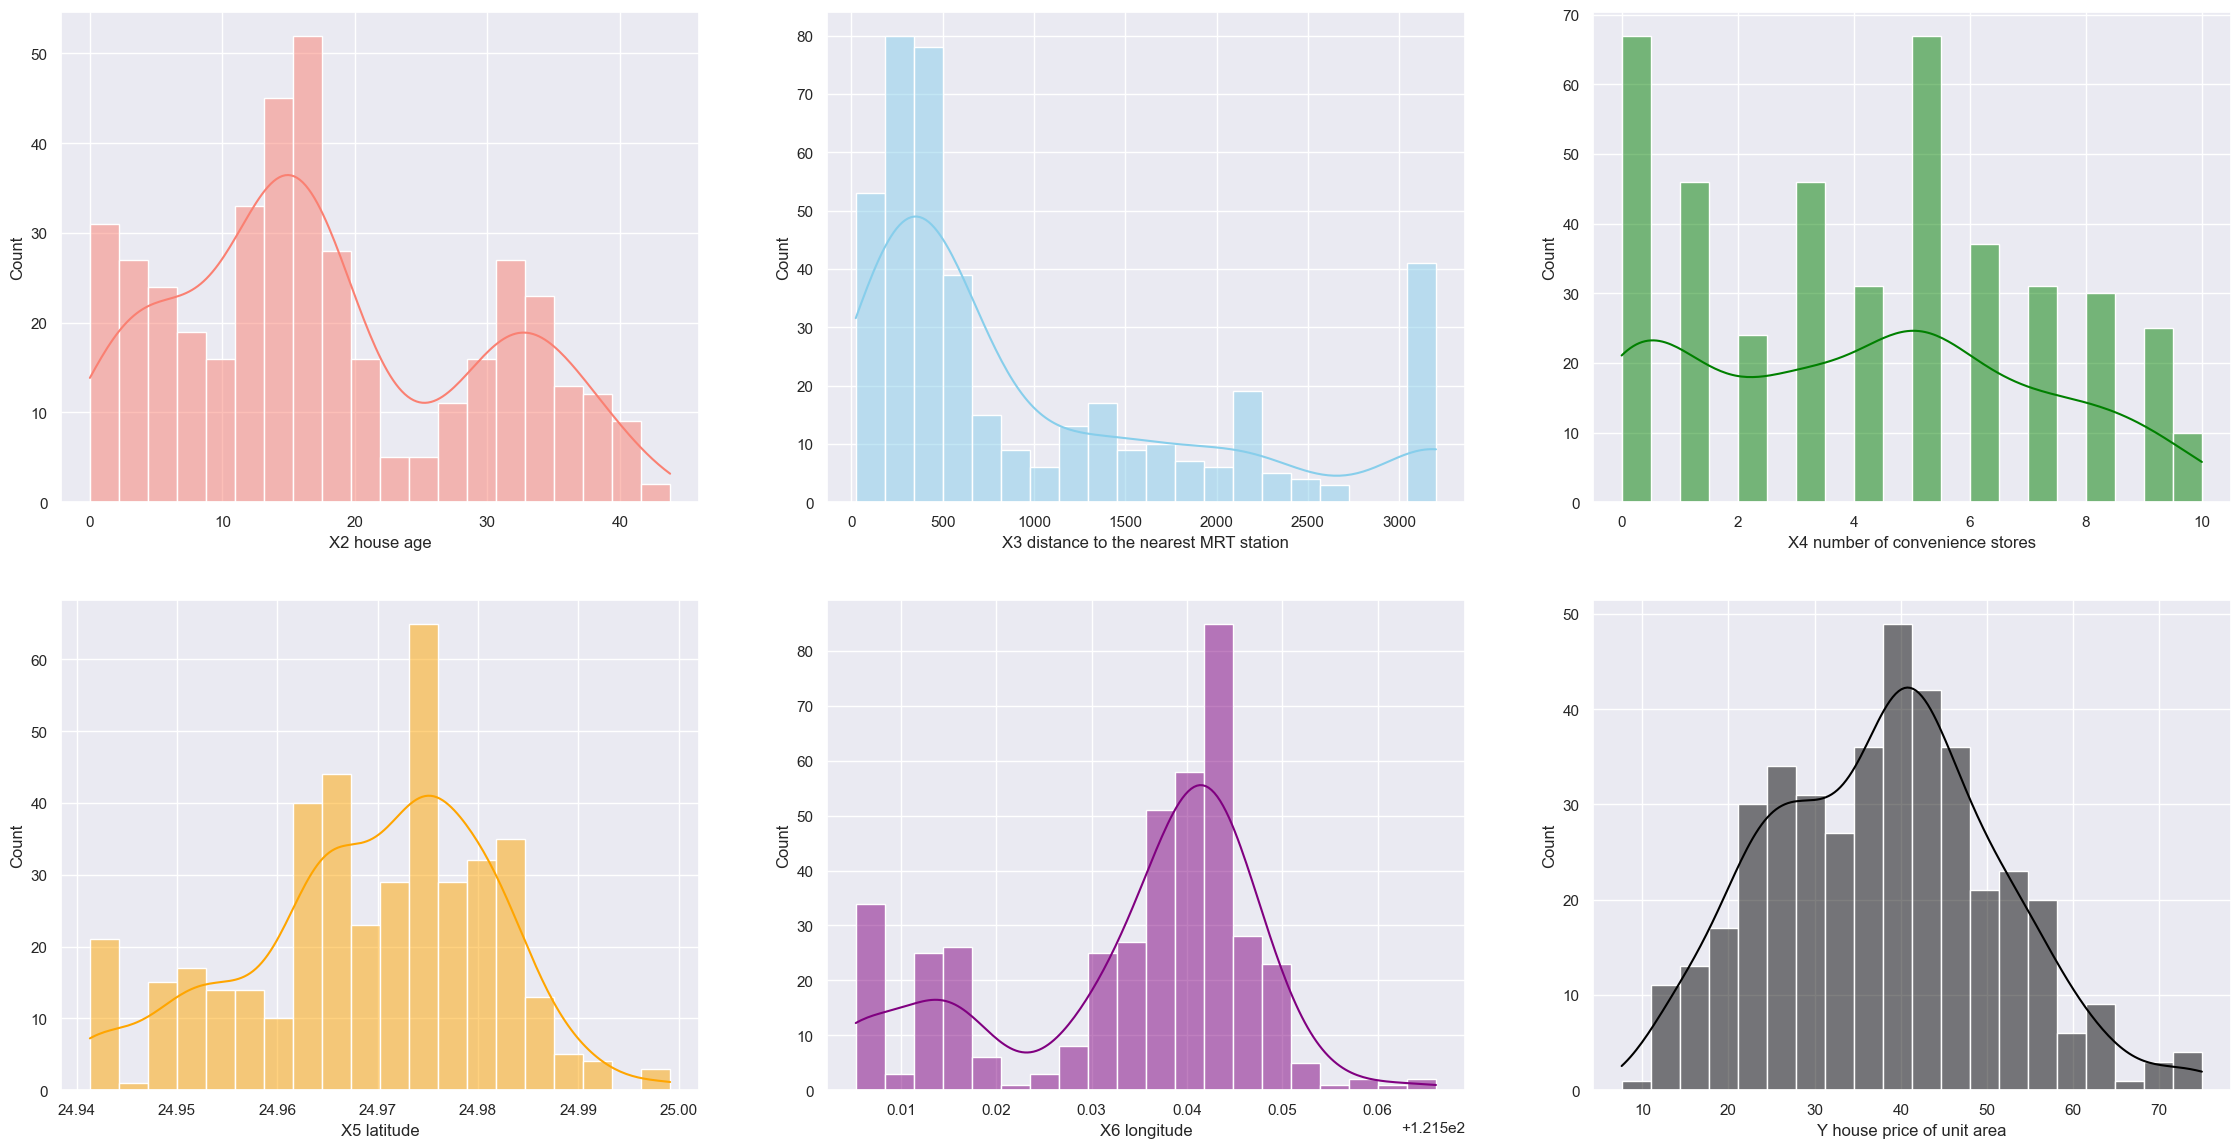

In [130]:
plt.figure(figsize=(28, 14))
hist_colors = ['salmon', 'skyblue', 'green', 'orange', 'purple','black','blue']

num_plots = len(numerical_columns)
num_rows = 2
num_cols = (num_plots + num_rows - 1) // num_rows

for i, column in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=df_capped[column], kde=True, color=hist_colors[i], bins=20)

plt.show()

[Text(0, 0, '30'),
 Text(0, 0, '27'),
 Text(0, 0, '31'),
 Text(0, 0, '38'),
 Text(0, 0, '28'),
 Text(0, 0, '46'),
 Text(0, 0, '25'),
 Text(0, 0, '32'),
 Text(0, 0, '29'),
 Text(0, 0, '58'),
 Text(0, 0, '47'),
 Text(0, 0, '23')]

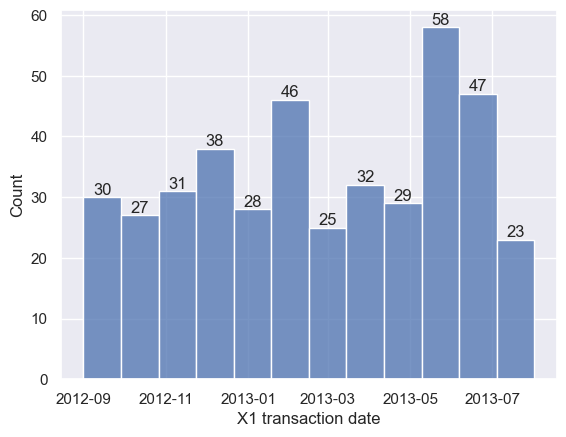

In [131]:
ax1 = sns.histplot(df_capped["X1 transaction date"], bins=12, kde=False)
ax1.bar_label(
    ax1.containers[0], fmt=lambda x: f"{x:0.0f}" if x > 0 else "", label_type="edge"
)

In [132]:
df_capped["X2 house age"].max()

43.8

[Text(0, 0, '62'),
 Text(0, 0, '45'),
 Text(0, 0, '77'),
 Text(0, 0, '90'),
 Text(0, 0, '23'),
 Text(0, 0, '17'),
 Text(0, 0, '52'),
 Text(0, 0, '36'),
 Text(0, 0, '12')]

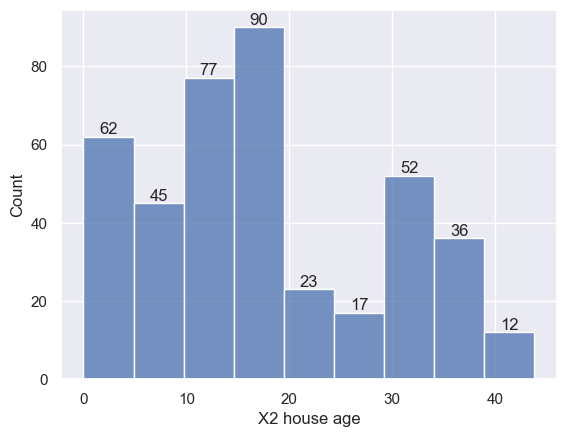

In [133]:
ax2 = sns.histplot(df_capped["X2 house age"], bins=9)
ax2.bar_label(
    ax2.containers[0], fmt=lambda x: f"{x:0.0f}" if x > 0 else "", label_type="edge"
)

[Text(0, 0, '224'),
 Text(0, 0, '56'),
 Text(0, 0, '39'),
 Text(0, 0, '25'),
 Text(0, 0, '27'),
 Text(0, 0, '43')]

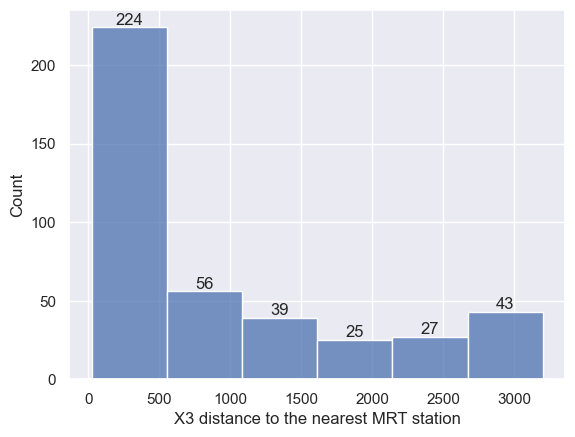

In [134]:
ax3 = sns.histplot(df_capped["X3 distance to the nearest MRT station"], bins=6)
ax3.bar_label(
    ax3.containers[0], fmt=lambda x: f"{x:0.0f}" if x > 0 else "", label_type="edge"
)

[Text(0, 0, '67'),
 Text(0, 0, '46'),
 Text(0, 0, '24'),
 Text(0, 0, '46'),
 Text(0, 0, '31'),
 Text(0, 0, '67'),
 Text(0, 0, '37'),
 Text(0, 0, '31'),
 Text(0, 0, '30'),
 Text(0, 0, '35')]

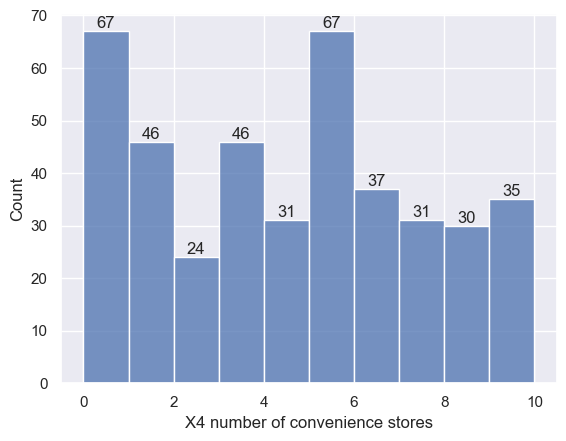

In [135]:
ax4 = sns.histplot(df_capped["X4 number of convenience stores"], bins=10)
ax4.bar_label(
    ax4.containers[0], fmt=lambda x: f"{x:0.0f}" if x > 0 else "", label_type="edge"
)

[Text(0, 0, '42'),
 Text(0, 0, '122'),
 Text(0, 0, '163'),
 Text(0, 0, '70'),
 Text(0, 0, '17')]

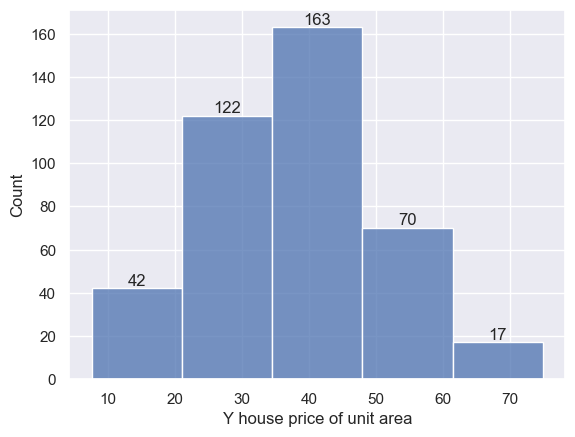

In [136]:
ay = sns.histplot(df_capped["Y house price of unit area"], bins=5)
ay.bar_label(
    ay.containers[0], fmt=lambda x: f"{x:0.0f}" if x > 0 else "", label_type="edge"
)

In [137]:
# timeseres_x1_y = sns.lineplot(
#     x=df_capped["X1 transaction date"],
#     y=df_capped["Y house price of unit area"],
#     marker="*",
#     markerfacecolor="Red",
#     markersize=10,
# )
# timeseres_x1_y.set_title(label="Time Series between Transaction Date and House Price")
# timeseres_x1_y.set_xlabel(xlabel="Transaction Date")
# timeseres_x1_y.set_ylabel(ylabel="House Price of unit area")

In [138]:
df_capped[["X1 transaction date"]] = df_capped[["X1 transaction date"]].astype(
    "category"
)

In [139]:
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   X1 transaction date                     414 non-null    category
 1   X2 house age                            414 non-null    float64 
 2   X3 distance to the nearest MRT station  414 non-null    float64 
 3   X4 number of convenience stores         414 non-null    float64 
 4   X5 latitude                             414 non-null    float64 
 5   X6 longitude                            414 non-null    float64 
 6   Y house price of unit area              414 non-null    float64 
dtypes: category(1), float64(6)
memory usage: 20.3 KB


<Axes: xlabel='count', ylabel='X1 transaction date'>

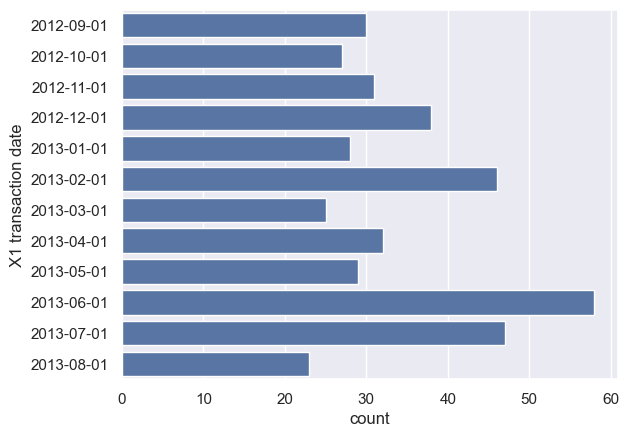

In [140]:
sns.countplot(df_capped["X1 transaction date"])

c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Hort\

<Figure size 1200x800 with 0 Axes>

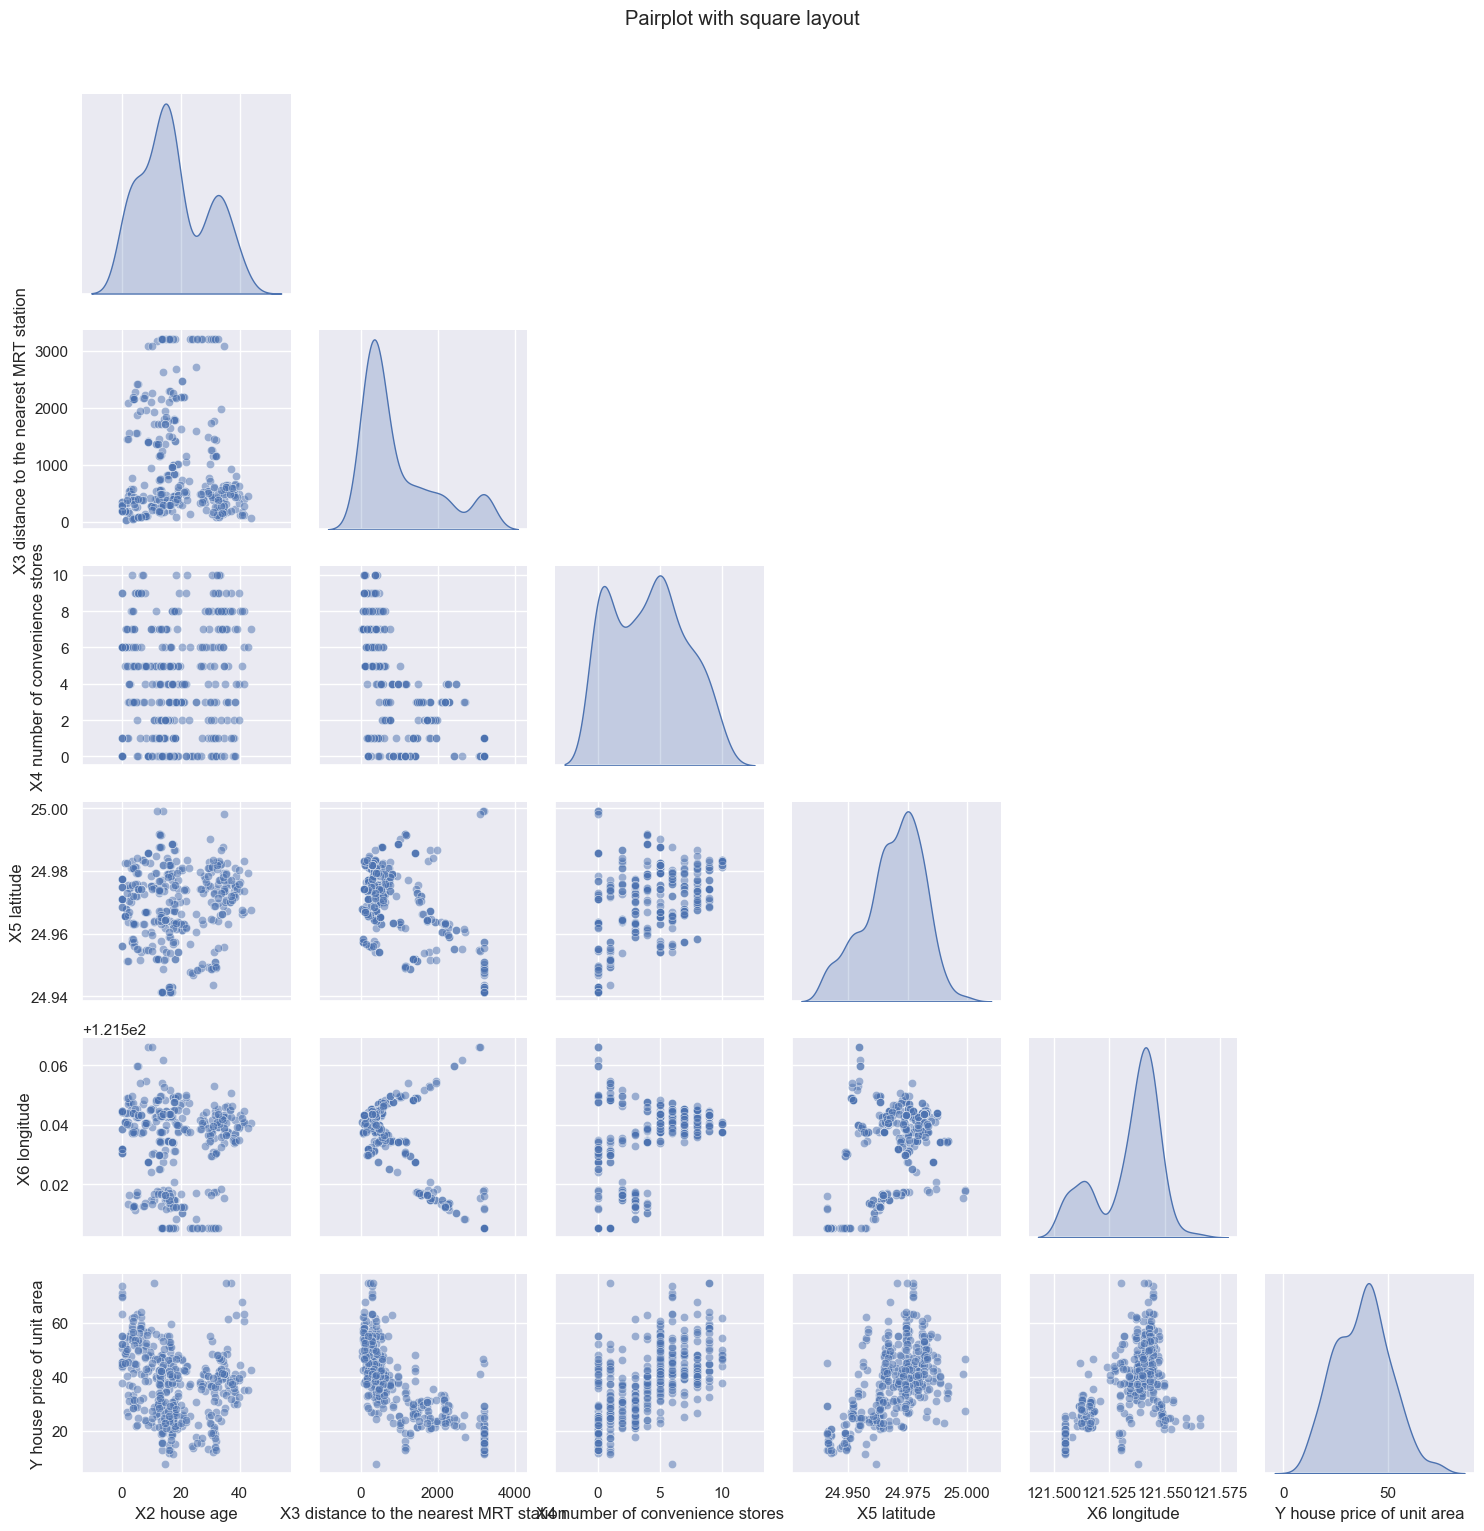

c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Hort\

<Figure size 1200x800 with 0 Axes>

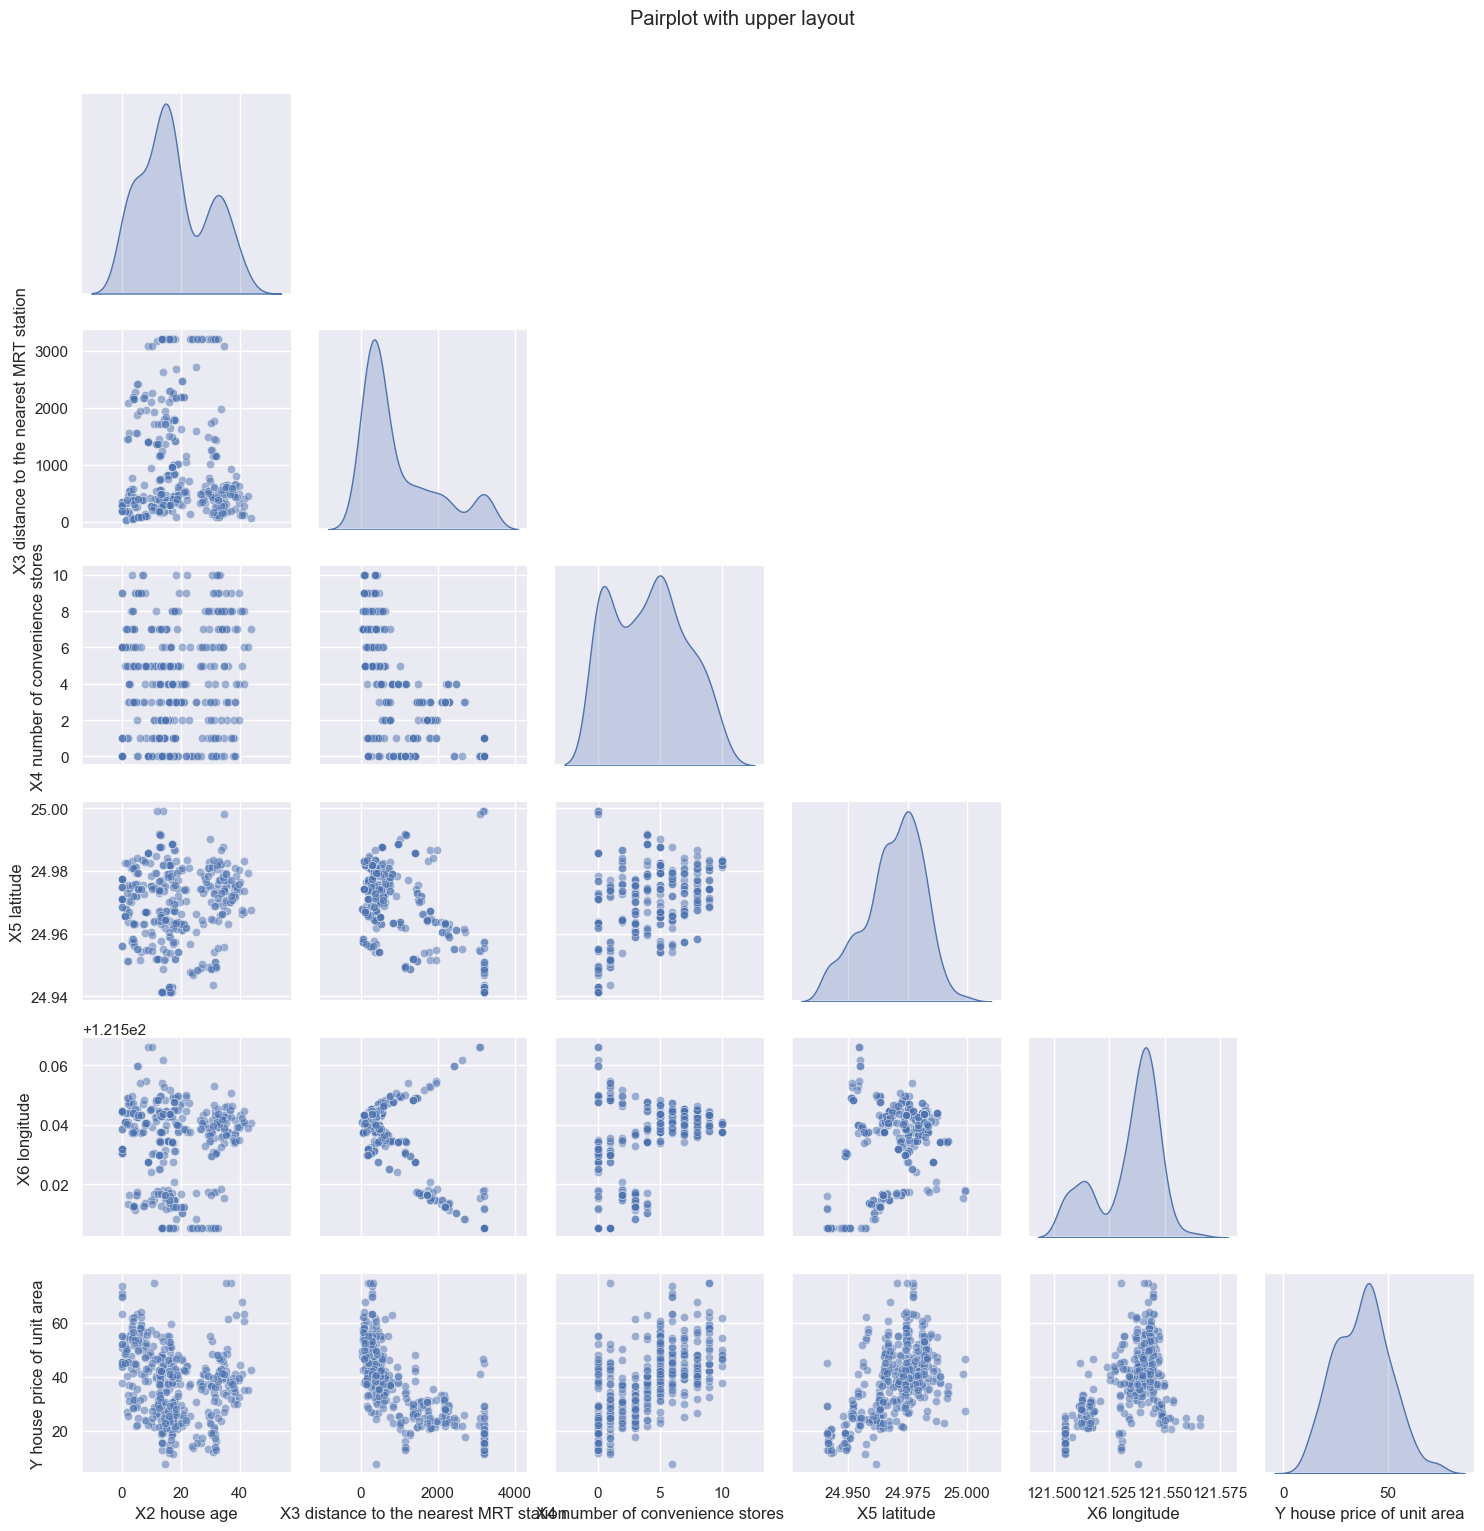

c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Hort\

<Figure size 1200x800 with 0 Axes>

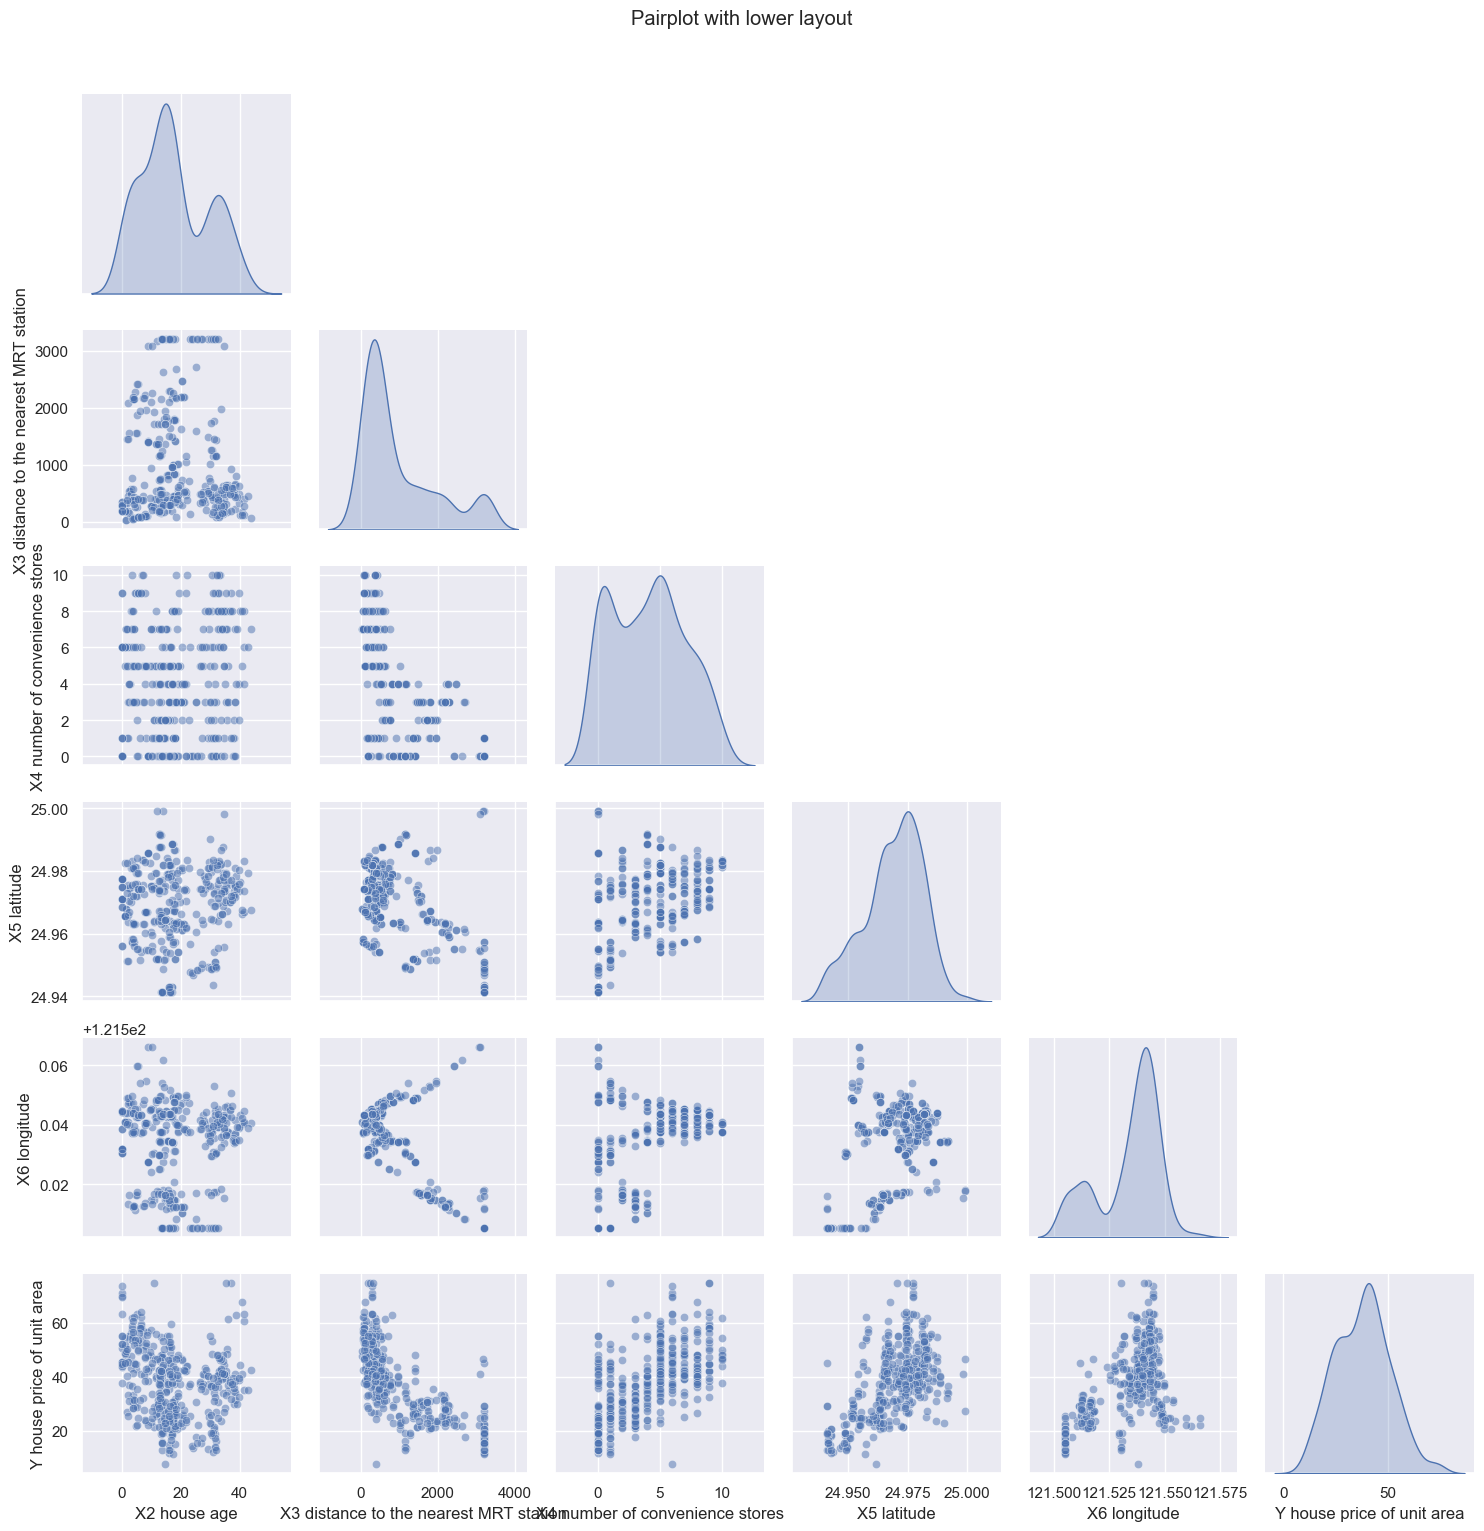

c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\Hort\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Hort\

<Figure size 1200x800 with 0 Axes>

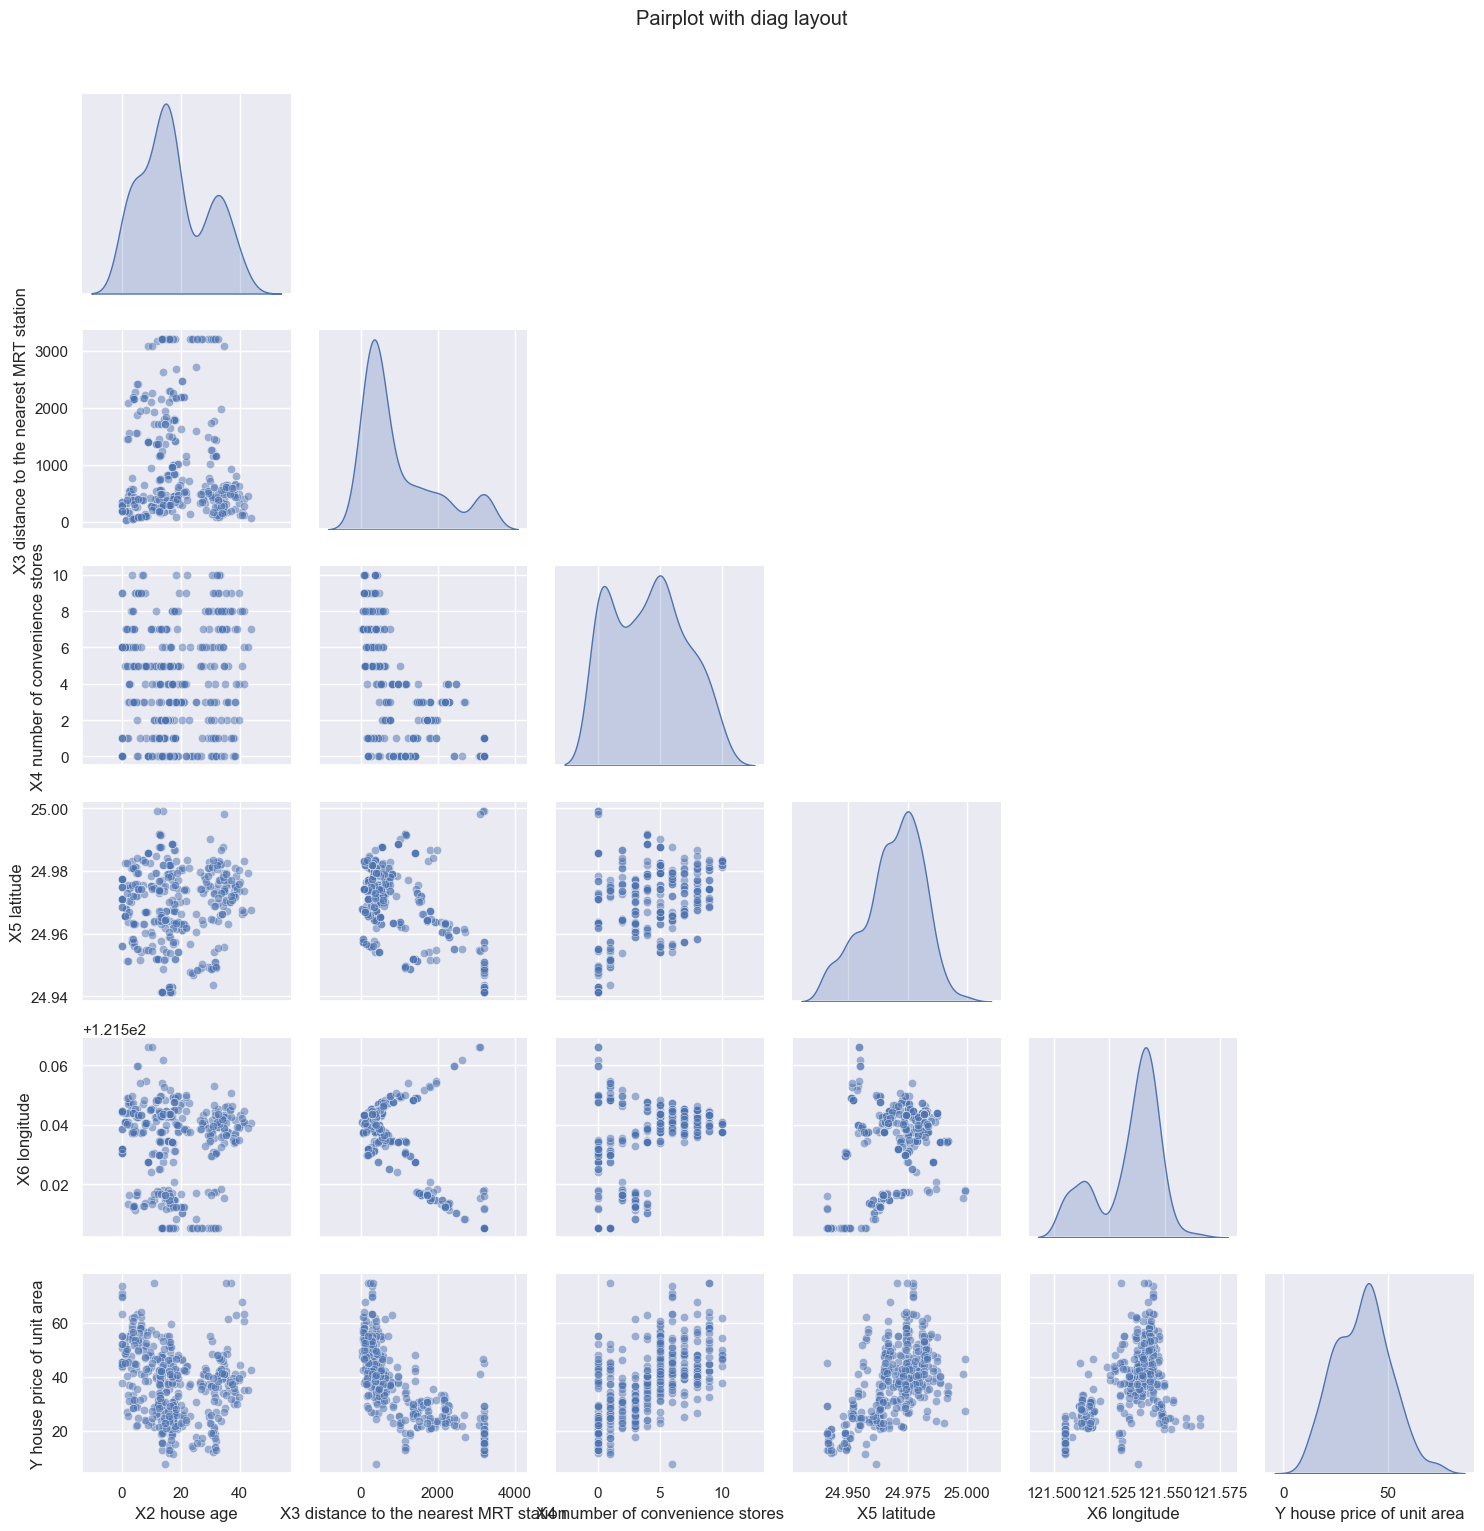

In [141]:
layouts = ["square", "upper", "lower", "diag"]
for layout in layouts:
    plt.figure(figsize=(12, 8))
    sns.pairplot(data=df_capped, kind="scatter", diag_kind="kde", hue=None, palette="husl",plot_kws={'alpha':0.5}, diag_kws={'shade': True}, corner=True, height=2.5)
    plt.suptitle(f"Pairplot with {layout} layout", y=1.02)
    plt.tight_layout()
    plt.show()

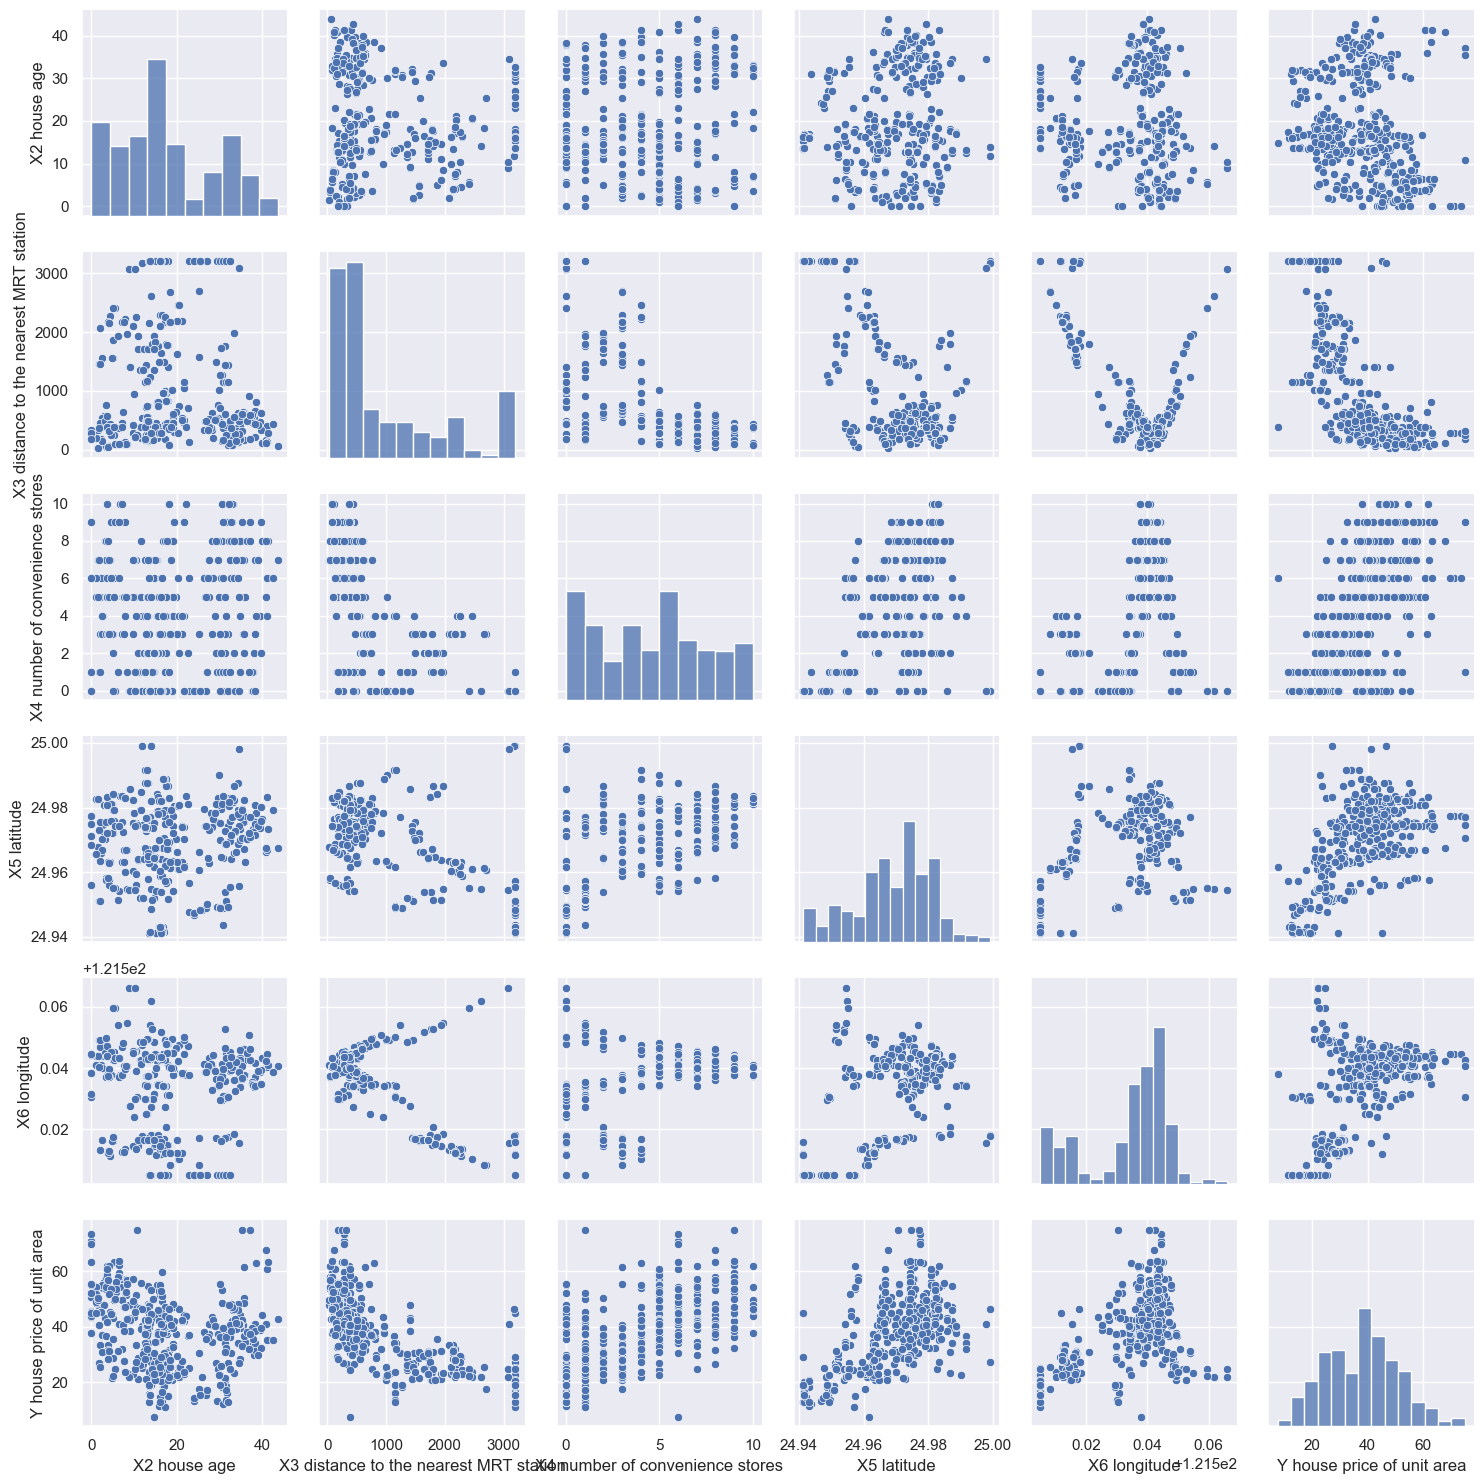

In [142]:
sns.pairplot(df_capped)
plt.tight_layout() 

<Axes: >

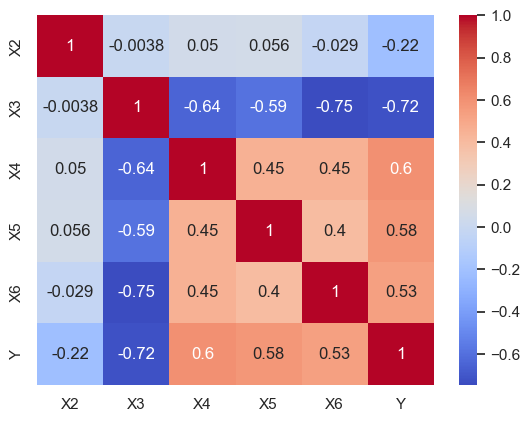

In [143]:
cr = df_capped.corr(numeric_only=True)
sns.heatmap(cr, annot=True, cmap="coolwarm",xticklabels=["X2","X3","X4","X5","X6","Y"],yticklabels=["X2","X3","X4","X5","X6","Y"])

In [144]:
# df_capped.drop(columns=["X5 latitude","X6 longitude"], inplace=True)

In [145]:
df_capped.head(5)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012-12-01,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,2012-12-01,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,2013-08-01,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,2013-07-01,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,2012-11-01,5.0,390.56840,5.0,24.97937,121.54245,43.1


In [146]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

data_x = df_capped.iloc[:, 1:-1]
data_y = df_capped.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, test_size=0.2, random_state=42, shuffle=True
)
LR = linear_model.LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [147]:
import statsmodels.api as sm

LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
y_train_pred = LR.predict(x_train)
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.622
Model:                                    OLS   Adj. R-squared:                  0.616
Method:                         Least Squares   F-statistic:                     106.8
Date:                        Fri, 23 Feb 2024   Prob (F-statistic):           2.03e-66
Time:                                07:48:30   Log-Likelihood:                -1160.5
No. Observations:                         331   AIC:                             2333.
Df Residuals:                             325   BIC:                             2356.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [148]:
x_test = sm.add_constant(x_test)
model1 = sm.OLS(y_test, x_test).fit()
print(model1.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.713
Model:                                    OLS   Adj. R-squared:                  0.695
Method:                         Least Squares   F-statistic:                     38.32
Date:                        Fri, 23 Feb 2024   Prob (F-statistic):           1.48e-19
Time:                                07:48:30   Log-Likelihood:                -278.51
No. Observations:                          83   AIC:                             569.0
Df Residuals:                              77   BIC:                             583.5
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [149]:
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
)
from math import sqrt

print(
    f"Test: r2={r2_score(y_test,y_pred):0.2f}; RMSE={sqrt(mean_squared_error(y_test,y_pred)):0.2f}; MAE={mean_absolute_error(y_test,y_pred):0.2f}; MAPE={mean_absolute_percentage_error(y_test,y_pred):0.2f}"
)
print(
    f"Train: r2={r2_score(y_train,y_train_pred):0.2f}; RMSE={sqrt(mean_squared_error(y_train,y_train_pred)):0.2f}; MAE={mean_absolute_error(y_train,y_train_pred):0.2f}; MAPE={mean_absolute_percentage_error(y_train,y_train_pred):0.2f}"
)
print(
    f"train-test= {(100*abs(r2_score(y_train,y_train_pred)-r2_score(y_test,y_pred))/r2_score(y_train,y_train_pred)):0.2f}%"
)
from tabulate import tabulate

data10 = [
    [
        "Train",
        round(r2_score(y_train, y_train_pred), 2),
        round(sqrt(mean_squared_error(y_train, y_train_pred)), 2),
        round(mean_absolute_error(y_train, y_train_pred), 2),
        round(mean_absolute_percentage_error(y_train, y_train_pred), 2),
    ],
    [
        "Test",
        round(r2_score(y_test, y_pred), 2),
        round(sqrt(mean_squared_error(y_test, y_pred)), 2),
        round(mean_absolute_error(y_test, y_pred), 2),
        round(mean_absolute_percentage_error(y_test, y_pred), 2),
    ],
]
columns10 = ["Model", "R-squared", "RMSE", "MAE", "MAPE"]

print(tabulate(data10, headers=columns10, tablefmt="fancy_grid"))

Test: r2=0.71; RMSE=6.99; MAE=4.82; MAPE=0.15
Train: r2=0.62; RMSE=8.06; MAE=5.80; MAPE=0.17
train-test= 13.99%
╒═════════╤═════════════╤════════╤═══════╤════════╕
│ Model   │   R-squared │   RMSE │   MAE │   MAPE │
╞═════════╪═════════════╪════════╪═══════╪════════╡
│ Train   │        0.62 │   8.06 │  5.8  │   0.17 │
├─────────┼─────────────┼────────┼───────┼────────┤
│ Test    │        0.71 │   6.99 │  4.82 │   0.15 │
╘═════════╧═════════════╧════════╧═══════╧════════╛


In [150]:
from sklearn.preprocessing import StandardScaler

# Standardize the input features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train the linear regression model
LR = linear_model.LinearRegression()
LR.fit(x_train_scaled, y_train)

# Predictions on the standardized test set
predictions_scaled = LR.predict(x_test_scaled)
y_scaled_train_pred= LR.predict(x_train_scaled)

In [151]:
Accuracy_LR_scaled = [
    [
        "Train",
        round(r2_score(y_train, y_scaled_train_pred), 2),
        round(sqrt(mean_squared_error(y_train, y_scaled_train_pred)), 2),
        round(mean_absolute_error(y_train, y_scaled_train_pred), 2),
        round(mean_absolute_percentage_error(y_train, y_scaled_train_pred), 2),
    ],
    [
        "Test",
        round(r2_score(y_test, predictions_scaled), 2),
        round(sqrt(mean_squared_error(y_test, predictions_scaled)), 2),
        round(mean_absolute_error(y_test, predictions_scaled), 2),
        round(mean_absolute_percentage_error(y_test, predictions_scaled), 2),
    ],
]

print(tabulate(Accuracy_LR_scaled, headers=columns10, tablefmt="fancy_grid"))

╒═════════╤═════════════╤════════╤═══════╤════════╕
│ Model   │   R-squared │   RMSE │   MAE │   MAPE │
╞═════════╪═════════════╪════════╪═══════╪════════╡
│ Train   │        0.62 │   8.06 │  5.8  │   0.17 │
├─────────┼─────────────┼────────┼───────┼────────┤
│ Test    │        0.71 │   6.99 │  4.82 │   0.15 │
╘═════════╧═════════════╧════════╧═══════╧════════╛


Regression Plot 

In [152]:
# for column in data_x.select_dtypes(include="number").columns.tolist():
#     plt.figure(figsize=(15, 7))
#     plt.subplot(1, 2, 1)
#     sns.regplot(x=x_train[column], y=y_train)
#     plt.show()

In [153]:
LR.intercept_

38.24365558912392

In [154]:
LR.coef_

array([ 0.        , -3.15307082, -5.84820411,  2.81091063,  3.01815764,
       -0.12446508])

# XG boost

XGboost builds cycles that repeatedly builds new models and combines them into an ensemble model. It is started by calculating the errors for each observation in the dataset. And build model to predict those. Add the predictions of error into the ensemble model.

In [155]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import asarray

In [156]:
# train_dmatrix = xg.DMatrix(data = x_train, label = y_train) 
# test_dmatrix = xg.DMatrix(data = x_test, label = y_test) 

In [157]:
x_train, x_test, y_train, y_test = train_test_split(
    data_x, data_y, test_size=0.2, random_state=42, shuffle=True
)

In [173]:
xgb_r = xg.XGBRegressor(
    objective="reg:squarederror",
    # n_estimators=100,
    learning_rate=0.01,
    n_jobs=-1,
    seed=42,
    # eval_metric="rmse",
    # # early_stopping_rounds=10,
    # max_depth=5,
    # subsample=0.8,
    # colsample_bytree=0.6,
    # gamma=1,
    # reg_alpha=1,
    # reg_lambda=1,
    # booster="gbtree",
    # num_boost_round=10,
)

In [180]:
xgb_r.fit(
    x_train,
    y_train,
    # eval_set=[(x_test, y_test)],
    # verbose=False,
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [182]:
pred = xgb_r.predict(x_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" % (rmse))

RMSE :  7.312059


In [161]:
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=21)
# scores = cross_val_score(
#     xgb_r, data_x, data_y, scoring="neg_root_mean_squared_error", cv=cv,verbose=False
# )
# scores = absolute(scores)
# print('Mean RMSE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [162]:
# from xgboost import cv

# data_dmatrix = xg.DMatrix(data=data_x, label=data_y)
# params = {
#     "objective": "reg:linear",
#     "colsample_bytree": 0.3,
#     "learning_rate": 0.1,
#     "max_depth": 5,
#     "alpha": 10,
# }

# xgb_cv = cv(
#     dtrain=data_dmatrix,
#     params=params,
#     nfold=3,
#     num_boost_round=50,
#     early_stopping_rounds=10,
#     metrics="rmse",
#     as_pandas=True,
#     seed=123,
# )

In [163]:
# xgb_cv.head()

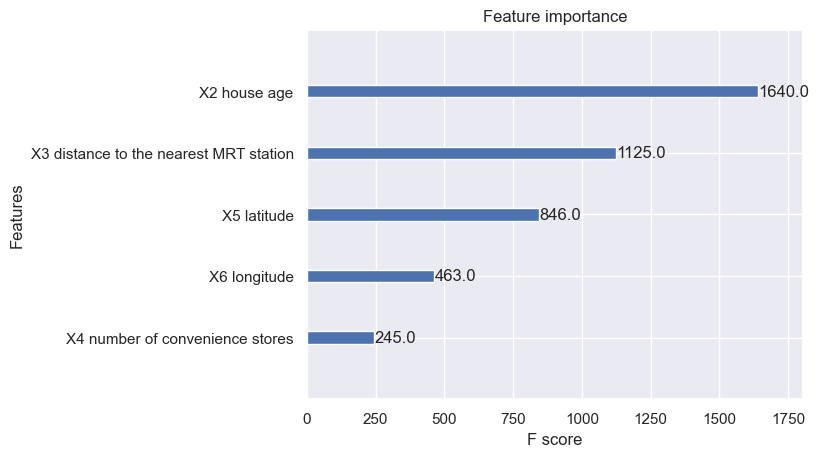

<Figure size 1600x1200 with 0 Axes>

In [176]:
xg.plot_importance(xgb_r)
plt.figure(figsize = (16, 12))
plt.show()

In [184]:
print(
    f"Test: r2={r2_score(y_test,xgb_r.predict(x_test)):0.2f}; RMSE={sqrt(mean_squared_error(y_test,xgb_r.predict(x_test))):0.2f}; MAE={mean_absolute_error(y_test,xgb_r.predict(x_test)):0.2f}; MAPE={mean_absolute_percentage_error(y_test,xgb_r.predict(x_test)):0.2f}"
)
print(
    f"Train: r2={r2_score(y_train,xgb_r.predict(x_train)):0.2f}; RMSE={sqrt(mean_squared_error(y_train,xgb_r.predict(x_train))):0.2f}; MAE={mean_absolute_error(y_train,xgb_r.predict(x_train)):0.2f}; MAPE={mean_absolute_percentage_error(y_train,xgb_r.predict(x_train)):0.2f}"
)
print(
    f"train-test= {(100*abs(r2_score(y_train,xgb_r.predict(x_train))-r2_score(y_test,xgb_r.predict(x_test)))/r2_score(y_train,xgb_r.predict(x_train))):0.2f}%"
)

Accuracy_XG_Default = [
    [
        "Train",
        round(r2_score(y_train, xgb_r.predict(x_train)), 2),
        round(sqrt(mean_squared_error(y_train, xgb_r.predict(x_train))), 2),
        round(mean_absolute_error(y_train, xgb_r.predict(x_train)), 2),
        round(mean_absolute_percentage_error(y_train, xgb_r.predict(x_train)), 2),
    ],
    [
        "Test",
        round(r2_score(y_test, xgb_r.predict(x_test)), 2),
        round(sqrt(mean_squared_error(y_test, xgb_r.predict(x_test))), 2),
        round(mean_absolute_error(y_test, xgb_r.predict(x_test)), 2),
        round(mean_absolute_percentage_error(y_test, xgb_r.predict(x_test)), 2),
    ],
]
columns10 = ["Model", "R-squared", "RMSE", "MAE", "MAPE"]

print(tabulate(Accuracy_XG_Default, headers=columns10, tablefmt="fancy_grid"))

Test: r2=0.68; RMSE=7.31; MAE=5.81; MAPE=0.21
Train: r2=0.75; RMSE=6.52; MAE=5.00; MAPE=0.17
train-test= 9.50%
╒═════════╤═════════════╤════════╤═══════╤════════╕
│ Model   │   R-squared │   RMSE │   MAE │   MAPE │
╞═════════╪═════════════╪════════╪═══════╪════════╡
│ Train   │        0.75 │   6.52 │  5    │   0.17 │
├─────────┼─────────────┼────────┼───────┼────────┤
│ Test    │        0.68 │   7.31 │  5.81 │   0.21 │
╘═════════╧═════════════╧════════╧═══════╧════════╛


### Gridsearch CV

In [185]:
from sklearn.model_selection import GridSearchCV

In [186]:
param_grid = {
    "n_estimators": [100, 500, 1000],
    "learning_rate": [0.01],
    "max_depth": [3, 5, 7, 9],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 1, 5],
    "reg_alpha": [0.1, 1.0, 10.0],
    "reg_lambda": [0.1, 1.0, 10.0],
}

xgb = xg.XGBRegressor(objective="reg:squarederror", seed=42, booster="gbtree")

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=3,
    verbose=1,
    n_jobs=-1,
)
grid_result = grid_search.fit(x_train, y_train)

print("Best Parameters: ", grid_result.best_params_)
print("Best Score (RMSE): ", np.sqrt(-grid_result.best_score_))

Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
Best Parameters:  {'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 1.0}
Best Score (RMSE):  6.877715882013359


In [188]:
grid_result.best_params_

{'colsample_bytree': 0.6,
 'gamma': 1,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 500,
 'reg_alpha': 0.1,
 'reg_lambda': 1.0,
 'subsample': 1.0}

RMSE from grid_result.best_score_:
* This RMSE is calculated during the grid search cross-validation process. It represents the average RMSE across all folds of cross-validation using the training data. 
* It is a metric used to compare different sets of hyperparameters during the search process.

In [189]:
best_xgb = xg.XGBRegressor(
    objective="reg:squarederror", seed=42, **grid_result.best_params_
)

best_xgb.fit(x_train, y_train)
y_pred = best_xgb.predict(x_test)

#### Evaluate the model

In [190]:
print(
    f"Test: r2={r2_score(y_test,best_xgb.predict(x_test)):0.2f}; RMSE={sqrt(mean_squared_error(y_test,best_xgb.predict(x_test))):0.2f}; MAE={mean_absolute_error(y_test,best_xgb.predict(x_test)):0.2f}; MAPE={mean_absolute_percentage_error(y_test,best_xgb.predict(x_test)):0.2f}"
)
print(
    f"Train: r2={r2_score(y_train,best_xgb.predict(x_train)):0.2f}; RMSE={sqrt(mean_squared_error(y_train,best_xgb.predict(x_train))):0.2f}; MAE={mean_absolute_error(y_train,best_xgb.predict(x_train)):0.2f}; MAPE={mean_absolute_percentage_error(y_train,best_xgb.predict(x_train)):0.2f}"
)
print(
    f"train-test= {(100*abs(r2_score(y_train,best_xgb.predict(x_train))-r2_score(y_test,best_xgb.predict(x_test)))/r2_score(y_train,best_xgb.predict(x_train))):0.2f}%"
)

data11 = [
    [
        "Train",
        round(r2_score(y_train, best_xgb.predict(x_train)), 2),
        round(sqrt(mean_squared_error(y_train, best_xgb.predict(x_train))), 2),
        round(mean_absolute_error(y_train, best_xgb.predict(x_train)), 2),
        round(mean_absolute_percentage_error(y_train, best_xgb.predict(x_train)), 2),
    ],
    [
        "Test",
        round(r2_score(y_test, best_xgb.predict(x_test)), 2),
        round(sqrt(mean_squared_error(y_test, best_xgb.predict(x_test))), 2),
        round(mean_absolute_error(y_test, best_xgb.predict(x_test)), 2),
        round(mean_absolute_percentage_error(y_test, best_xgb.predict(x_test)), 2),
    ],
]
columns11 = ["Model", "R-squared", "RMSE", "MAE", "MAPE"]

print(tabulate(data11, headers=columns11, tablefmt="fancy_grid"))

Test: r2=0.82; RMSE=5.51; MAE=3.79; MAPE=0.12
Train: r2=0.87; RMSE=4.80; MAE=3.60; MAPE=0.11
train-test= 5.44%
╒═════════╤═════════════╤════════╤═══════╤════════╕
│ Model   │   R-squared │   RMSE │   MAE │   MAPE │
╞═════════╪═════════════╪════════╪═══════╪════════╡
│ Train   │        0.87 │   4.8  │  3.6  │   0.11 │
├─────────┼─────────────┼────────┼───────┼────────┤
│ Test    │        0.82 │   5.51 │  3.79 │   0.12 │
╘═════════╧═════════════╧════════╧═══════╧════════╛


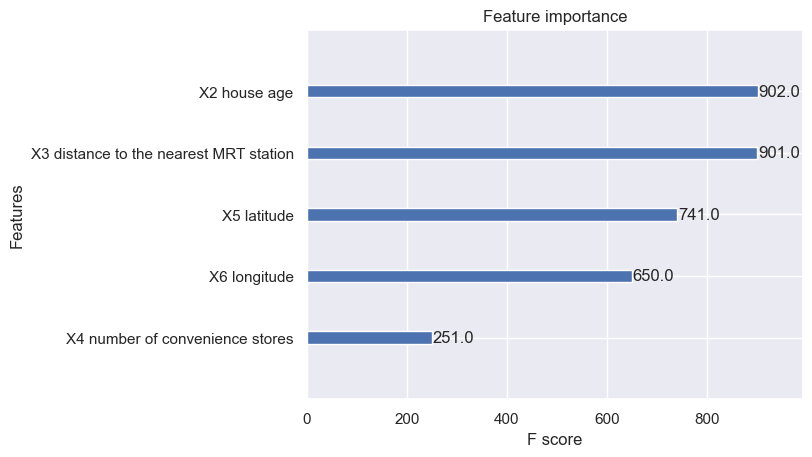

<Figure size 1600x1200 with 0 Axes>

In [191]:
xg.plot_importance(best_xgb)
plt.figure(figsize = (16, 12))
plt.show()